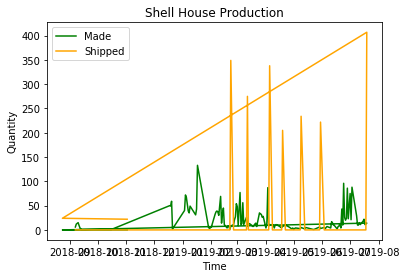

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

file = r"C:\Users\mkreidler\Desktop\Local Data\Shell Scans.xlsx"
class Block:
    def __init__(self):
        self.block_number = None
        self.date_start = None
        
df = pd.read_excel(file)

block_numbers = df["Block Number"].unique()

numb_blocks = len(blocks)
early_dates = dict()

blocks = []

for block in block_numbers:
    b = Block()
    dates = df.loc[df["Block Number"]==block, "Date Scanned"].tolist()
    earliest = min(dates)
    b.block_number = block
    b.date_start = earliest
    blocks.append(b)

    
dd = pd.DataFrame([vars(f) for f in blocks])
dd['dt_start'] = pd.to_datetime(dd['date_start'].astype(str), format='%Y%m%d')

file2 = r"C:\Users\mkreidler\Desktop\Local Data\shipdates.xlsx"

ship = pd.read_excel(file2)
ship['dt_ship'] = pd.to_datetime(ship['date_shipped'].astype(str), format='%Y%m%d')
merge = dd.merge(ship, on="block_number", how="outer")

#merge.to_excel(r"C:\Users\mkreidler\Desktop\shell.xlsx")

starts = merge[["block_number", "dt_start"]].groupby("dt_start").count()
starts

ends = merge[["block_number", "dt_ship"]].groupby("dt_ship").count()
ends

started = starts.reset_index()
started = started.rename(columns = {"block_number": "qty_made", "dt_start":"dt"})

shipped = ends.reset_index()
shipped = shipped.rename(columns = {"block_number": "qty_shipped", "dt_ship":"dt"})

merge = started.merge(shipped, on="dt", how="outer")

merge = merge.fillna(0)
fig, ax = plt.subplots()
ax.plot(merge.dt, merge.qty_made, color='g', label="Made")
ax.plot(merge.dt, merge.qty_shipped, color='orange', label="Shipped")
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Shell House Production')
classes = ["Made", "Shipped"]
colors = ["g", "orange"]
#legend2 = ax.legend(classes, colors, loc="upper right", title="Key")
ax.legend()
#plt.show()
plt.savefig(r"C:\Users\mkreidler\Desktop\shell.pdf")
merge.to_excel(r"C:\Users\mkreidler\Desktop\shell2.xlsx")

""
